# Salary Prediction with Polynomial Regression
In this module, we will explore what is probably the most common application of polynomial regression, that is, to predict the annual salary of an employee based on years of experience.

## Mathematics behind Polynomial Regression
Polynomial Regression, in simple terms, is the fitting of a polynomial curve to a dataset. It can be considered a special case of multivariable linear regression, where one the multivariates are the polynomial terms.

$$ y = b_0 + b_1 x + b_2 x^2 + ... + b_n x^n $$

### Import Libraries and Packages

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import Dataset

In [81]:
salary_df = pd.read_csv('Employee_Salary.csv')

## Exploratory Data Analysis (EDA)

In [82]:
salary_df.sample(5)

,Years of Experience,Salary
1348,12.078453,105235.39470
411,8.299125,86565.76116
1362,12.123634,109178.17360
1118,11.148828,96548.48994
495,8.785425,87325.89898


In [83]:
salary_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Years of Experience,2000.0,10.739095,2.989853,1.0,8.812255,10.738822,12.785483,20.0
Salary,2000.0,111942.422469,45055.817085,40000.0,87938.130895,93376.356875,116978.641550,500000.0


In [84]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
Years of Experience    2000 non-null float64
Salary                 2000 non-null float64
dtypes: float64(2)
memory usage: 31.4 KB


### Visualizations

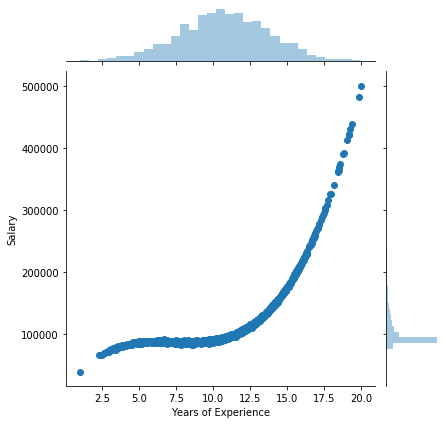

In [85]:
sns.jointplot(x='Years of Experience', y='Salary', data=salary_df)
plt.show()

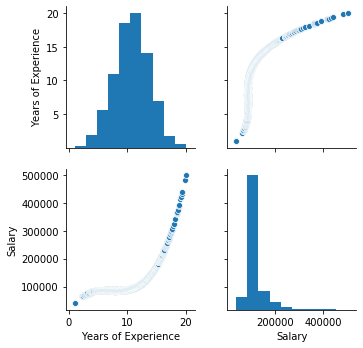

In [86]:
sns.pairplot(salary_df)
plt.show()

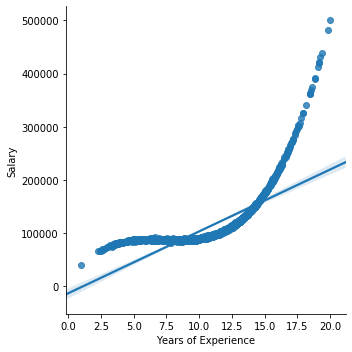

In [87]:
sns.lmplot(x='Years of Experience', y='Salary', data=salary_df)
plt.show()

We see how fitting a simple linear regression is a poor predictor for our dataset. We will therefore continue with our polynomial regression using sci-kit learn.

## Model Training and Testing (Simple Linear Regression OLS)
Let us first use sklearn to fit an simple linear regression.

In [126]:
X = salary_df[['Years of Experience']]
y = salary_df[['Salary']]
X_train = X
y_train = y

In [127]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
y_pred = regressor.predict(X_test)

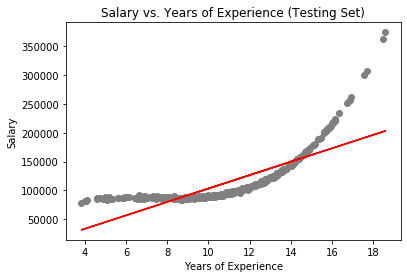

In [129]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience (Testing Set)')
plt.show()

In [130]:
print(f'Linear Regression Coefficient (b_0): {regressor.intercept_}')
print(f'Linear Regression Coefficient (b_1): {regressor.coef_}')

Linear Regression Coefficient (b_0): [-13063.09931519]
Linear Regression Coefficient (b_1): [[11640.22916165]]


#### Evaluation of our Regressor

In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae = mean_absolute_error(y_pred=regressor.predict(X_test), y_true=y_test)
mse = mean_squared_error(y_pred=regressor.predict(X_test), y_true=y_test)

print(f'MAE on test data is: {mae:2.3f}')
print(f'MSE on test data is: {mse:2.3f}')
print(f'RMSE on test data is: {sqrt(mse):2.3f}')

MAE on test data is: 18272.688
MSE on test data is: 629039606.418
RMSE on test data is: 25080.662


In [132]:
def mean_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) / y_true) * 100

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_pred = regressor.predict(X_test)
y_true = y_test

mpe = mean_percentage_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f'MPE on test data is: {mpe:2.2f} %')
print(f'MAPE on test data is: {mape:2.2f} %')

MPE on test data is: -1.72 %
MAPE on test data is: 16.11 %


In [133]:
from sklearn.metrics import r2_score
r2 = r2_score(y_pred=regressor.predict(X_test), y_true=y_test)
print(f'R^2 Score is: {r2:2.3f}')

R^2 Score is: 0.642


Pretty terrible, huh? Our simple linear model was a terrible fit for our data!

## Polynomial Regression (Multivariate Linear Regression)
We will now run our polynomial regression. We will have to begin by transforming our one column of features into a multi-array of features, and we will have to first call what order polynomial we wll use to fit to our data.

In [134]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree = 5)

# Convert our one feature into multi-array row of features of higher power terms
X_columns = poly_regressor.fit_transform(X_train)

In [135]:
X_columns.shape

(2000, 6)

In [136]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
y_pred = regressor.predict(X_columns)

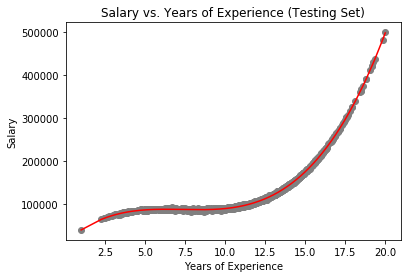

In [138]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, y_pred, color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience (Testing Set)')
plt.show()

In [179]:
for i in range(0, X_columns.shape[1]):
    print(f'Regressor Coefficient b_{i}: {regressor.coef_[0,i]}')

Regressor Coefficient b_0: 0.0
Regressor Coefficient b_1: 32794.97707822157
Regressor Coefficient b_2: -4655.786746160182
Regressor Coefficient b_3: 224.00123554719127
Regressor Coefficient b_4: -1.0352107025803332
Regressor Coefficient b_5: 0.020928427848792373


#### Evaluation of our Regressor

In [184]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae = mean_absolute_error(y_pred=y_pred, y_true=y_train)
mse = mean_squared_error(y_pred=y_pred, y_true=y_train)

print(f'MAE on test data is: {mae:2.3f}')
print(f'MSE on test data is: {mse:2.3f}')
print(f'RMSE on test data is: {sqrt(mse):2.3f}')

MAE on test data is: 1023.376
MSE on test data is: 1625733.126
RMSE on test data is: 1275.042


In [188]:
def mean_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) / y_true) * 100

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_true = y_train

mpe = mean_percentage_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f'MPE on test data is: {mpe:2.2f} %')
print(f'MAPE on test data is: {mape:2.2f} %')

MPE on test data is: -0.02 %
MAPE on test data is: 1.00 %


In [203]:
from sklearn.metrics import r2_score
r2 = r2_score(y_pred=regressor.predict(X_columns), y_true=y_train)
print(f'R^2 Score is: {r2:2.5f}')

R^2 Score is: 0.99920


In [207]:
def adjusted_r_squared(y_pred, y_true, data):
    from sklearn.metrics import r2_score
    r2 = r2_score(y_pred, y_true)
    adj_r2 = 1 - (1 - r2 ** 2) * ((data.shape[0] - 1) / (data.shape[0] - X_columns.shape[1] - 1))
    return adj_r2

adj_r2 = adjusted_r_squared(y_pred, y_train, salary_df)
print(f'Adjusted R^2 Score is: {adj_r2:2.5f}')

Adjusted R^2 Score is: 0.99839
